In [4]:
import pyfits as pf
import h5py
import numpy as np
import kmeans_radec
import matplotlib.pyplot as plt
%pylab inline
import treecorr
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
shear_data = ["../../redsequence/data/KiDS_DR3.1_G9_ugri_shear.fits", 
 "../../redsequence/data/KiDS_DR3.1_G12_ugri_shear.fits",
 "../../redsequence/data/KiDS_DR3.1_G15_ugri_shear.fits",
 "../../redsequence/data/KiDS_DR3.1_G23_ugri_shear.fits",
 "../../redsequence/data/KiDS_DR3.1_GS_ugri_shear.fits"]


kids_cat = pf.open("../../redsequence/data/KiDS_DR3.1_G9_ugri_shear.fits")
e1 = kids_cat[1].data['e1']
e2 = kids_cat[1].data['e2']
w = kids_cat[1].data['weight']
z_b = kids_cat[1].data['Z_B']
sg = kids_cat[1].data['SG_FLAG']
mask = kids_cat[1].data['MASK']
fitclass = kids_cat[1].data['fitclass']
ra = kids_cat[1].data['RAJ2000']
dec = kids_cat[1].data['DECJ2000']
snr = kids_cat[1].data['model_SNratio']
rm = kids_cat[1].data['bias_corrected_scalelength']
psf1 = kids_cat[1].data['PSF_e1']
psf2 = kids_cat[1].data['PSF_e2']

star_mask = np.where(sg==1)[0]
e1, e2, w, z_b, ra, dec , snr, rm , psf1, psf2 = e1[star_mask], e2[star_mask], w[star_mask], z_b[star_mask], ra[star_mask], dec[star_mask], snr[star_mask],rm[star_mask], psf1[star_mask], psf2[star_mask]

for i in range(1,5): 
    kids_cat = pf.open(shear_data[i])

    e1c = kids_cat[1].data['e1']
    e2c = kids_cat[1].data['e2']
    wc= kids_cat[1].data['weight']
    z_bc = kids_cat[1].data['Z_B']
    sgc = kids_cat[1].data['SG_FLAG']
    maskc = kids_cat[1].data['MASK']
    fitclassc = kids_cat[1].data['fitclass']
    rac = kids_cat[1].data['RAJ2000']
    decc = kids_cat[1].data['DECJ2000']
    snrc = kids_cat[1].data['model_SNratio']
    rmc = kids_cat[1].data['bias_corrected_scalelength']
    psf1c = kids_cat[1].data['PSF_e1']
    psf2c = kids_cat[1].data['PSF_e2']
    star_maskc = np.where(sgc==1)[0]
    e1c, e2c, wc, z_bc, rac, decc, snrc, rmc, psf1c, psf2c = e1c[star_maskc], e2c[star_maskc], wc[star_maskc], z_bc[star_maskc], rac[star_maskc], decc[star_maskc], snrc[star_maskc], rmc[star_maskc], psf1c[star_maskc], psf2c[star_maskc]
    e1 = np.hstack([e1,e1c])  
    e2 = np.hstack([e2,e2c])        
    w = np.hstack([w,wc])        
    z_b = np.hstack([z_b,z_bc])        
    ra = np.hstack([ra,rac])        
    dec = np.hstack([dec,decc]) 
    snr = np.hstack([snr,snrc])
    rm = np.hstack([rm,rmc])
    psf1 = np.hstack([psf1,psf1c])
    psf2 = np.hstack([psf2,psf2c])

In [6]:
source_mask = h5py.File("source_mask_zb_0.4_0.9.h5")

In [7]:
for i in range(3):
    print i
    result_file = h5py.File("source_zb_"+str(0.4+i*(0.2))+"_0.9.h5" , 'w')
    
    bad_north = ((dec>-10)&(((ra>145)&(ra<171))|((ra>195)&(ra<210))|(ra>227)))
    bad_south = (dec<-28)&(ra<30)
    bad = (bad_south)|(bad_north)
    
    
    zmask = (z_b>0.4+i*(0.2))&((z_b<0.9)|(z_b==0.9))
    zmask = zmask&(~bad)
    ns = len(ra[zmask])
    result_file.create_dataset("ra", (ns, ) , data = ra[zmask])
    result_file.create_dataset("dec",(ns, ) , data = dec[zmask])
    result_file.create_dataset("e1", (ns, ) , data = e1[zmask])
    result_file.create_dataset("e2", (ns, ) , data = e2[zmask])
    result_file.create_dataset("zb", (ns, ) , data = z_b[zmask])
    result_file.create_dataset("w", (ns, ) , data = w[zmask])
    result_file.create_dataset("rad", (ns,) , data= rm[zmask])
    result_file.create_dataset("snr", (ns ,) , data = rm[zmask])
    result_file.create_dataset("psf1", (ns,) , data= psf1[zmask])
    result_file.create_dataset("psf2", (ns ,) , data = psf2[zmask])
    result_file.close()

0
1
2


In [8]:
dense = h5py.File("../../redsequence/LRG_lmin_0.5_nbar_0.001_auto_vjune.h5" , "r")
lum = h5py.File("../../redsequence/LRG_lmin_1.0_nbar_0.0002_auto_vjune.h5", "r")
kids = h5py.File("../../redsequence/reduced_kids_auto.h5", "r")

In [9]:
ID_kids = kids["ID"][:]
RA_kids = kids["RA"][:]
DEC_kids = kids["DEC"][:]
radius_kids = kids["radius"][:]

In [10]:
ID_dense = dense["ID"][:]
ID_lum = lum["ID"][:]

In [11]:
mask_dense = np.where((np.in1d(ID_kids, ID_dense)==True))[0]

In [12]:
mask_lum = np.where((np.in1d(ID_kids, ID_lum)==True))[0]

(125, 245)

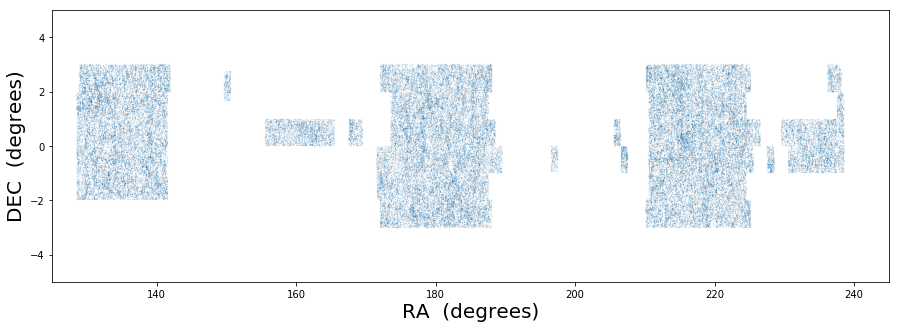

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(RA_kids[mask_dense] , DEC_kids[mask_dense] , s = 0.001)
plt.xlabel("RA  (degrees)" , fontsize =20)
plt.ylabel("DEC  (degrees)" , fontsize = 20)
plt.ylim((-5,5))
plt.xlim((125,245))

In [16]:
mask_lum = np.where((np.in1d(ID_kids, ID_lum)==True))[0]

(125, 245)

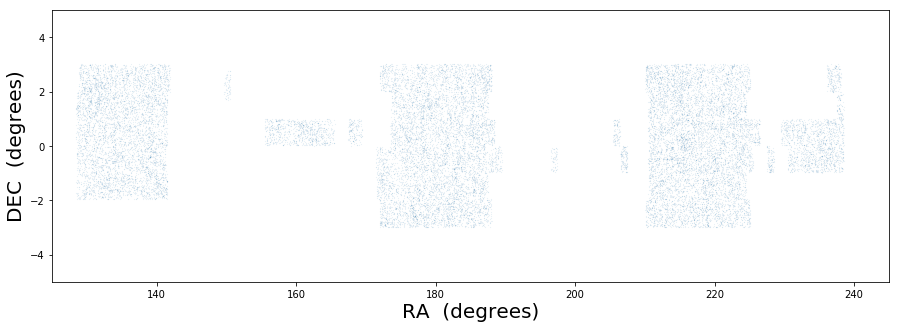

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(RA_kids[mask_lum] , DEC_kids[mask_lum] , s = 0.001)
plt.xlabel("RA  (degrees)" , fontsize =20)
plt.ylabel("DEC  (degrees)" , fontsize = 20)
plt.ylim((-5,5))
plt.xlim((125,245))

In [19]:
result_file = h5py.File("LRG_lum.h5" , 'w')
nlrg = len(ID_lum)
result_file.create_dataset("ID" , (nlrg,  ) , data = ID_lum, dtype = 'S25')
result_file.create_dataset("RA", (nlrg, ) , data = RA_kids[mask_lum])
result_file.create_dataset("DEC", (nlrg, ) , data = DEC_kids[mask_lum])
result_file.create_dataset("redshift", (nlrg, ) , data = lum['redshift'][:])
result_file.create_dataset("radius", (nlrg, ) , data = radius_kids[mask_lum])
result_file.close()


result_file = h5py.File("LRG_lum_jk.h5" , 'w')

ra_lum = RA_kids[mask_lum]
dec_lum = DEC_kids[mask_lum]

bad_north = ((dec_lum>-10)&(((ra_lum>145)&(ra_lum<171))|((ra_lum>195)&(ra_lum<210))|(ra_lum>227)))
bad_south = (dec_lum<-28)&(ra_lum<30)
bad = (bad_south)|(bad_north)
jk_mask = ~bad

nlrg = len(ID_lum[jk_mask])
result_file.create_dataset("ID" , (nlrg,  ) , data = ID_lum[jk_mask], dtype = 'S25')
result_file.create_dataset("RA", (nlrg, ) , data = RA_kids[mask_lum][jk_mask])
result_file.create_dataset("DEC", (nlrg, ) , data = DEC_kids[mask_lum][jk_mask])
result_file.create_dataset("redshift", (nlrg, ) , data = lum['redshift'][jk_mask])
result_file.create_dataset("radius", (nlrg, ) , data = radius_kids[mask_lum][jk_mask])
result_file.close()

In [20]:
result_file = h5py.File("LRG_dense.h5" , 'w')
nlrg = len(ID_dense)
result_file.create_dataset("ID" , (nlrg,  ) , data = ID_dense, dtype = 'S25')
result_file.create_dataset("RA", (nlrg, ) , data = RA_kids[mask_dense])
result_file.create_dataset("DEC", (nlrg, ) , data = DEC_kids[mask_dense])
result_file.create_dataset("redshift", (nlrg, ) , data = dense['redshift'][:])
result_file.create_dataset("radius", (nlrg,) , data = radius_kids[mask_dense])
result_file.close()


result_file = h5py.File("LRG_dense_jk.h5" , 'w')

ra_dense = RA_kids[mask_dense]
dec_dense = DEC_kids[mask_dense]

bad_north = ((dec_dense>-10)&(((ra_dense>145)&(ra_dense<171))|((ra_dense>195)&(ra_dense<210))|(ra_dense>227)))
bad_south = (dec_dense<-28)&(ra_dense<30)
bad = (bad_south)|(bad_north)
jk_mask = ~bad

nlrg = len(ID_dense[jk_mask])
result_file.create_dataset("ID" , (nlrg,  ) , data = ID_dense[jk_mask], dtype = 'S25')
result_file.create_dataset("RA", (nlrg, ) , data = RA_kids[mask_dense][jk_mask])
result_file.create_dataset("DEC", (nlrg, ) , data = DEC_kids[mask_dense][jk_mask])
result_file.create_dataset("redshift", (nlrg, ) , data = dense['redshift'][jk_mask])
result_file.create_dataset("radius", (nlrg, ) , data = radius_kids[mask_dense][jk_mask])
result_file.close()

0.01225


Text(0.5,0,u'5. * KRON RADIUS [arc minute]')

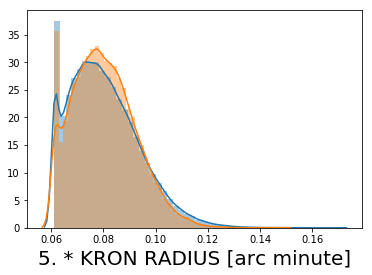

In [22]:
lum = h5py.File("LRG_lum_jk.h5")
dense = h5py.File("LRG_dense_jk.h5")

lum_rad = lum["radius"][:]
dense_rad = dense["radius"][:]
print dense_rad.min() * 0.21/60
sns.distplot(5. * dense_rad * 0.21/60)#, kde = False)
sns.distplot(5. * lum_rad * 0.21/60)# , kde = False)
#plt.xscale("log")
plt.xlabel("5. * KRON RADIUS [arc minute]" , fontsize = 20)

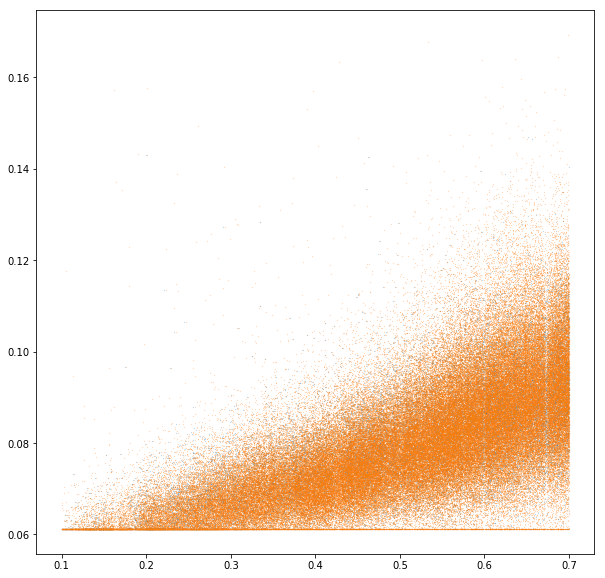

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(lum["redshift"][:], lum["radius"][:]* 5 * 0.21/60 , s = 0.01)
plt.scatter(dense["redshift"][:], dense["radius"][:]* 5 * 0.21/60 , s = 0.01)

In [106]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0 = 1 , Om0=0.3)

In [109]:
lum_comoving_size = cosmo.kpc_comoving_per_arcmin(lum["redshift"][:]) * lum["radius"][:]* 0.21/60
dense_comoving_size = cosmo.kpc_comoving_per_arcmin(dense["redshift"][:]) * dense["radius"][:]* 0.21/60

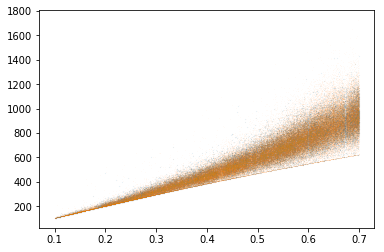

In [116]:
plt.scatter(lum["redshift"][:] , lum_comoving_size , s = 0.001)
plt.scatter(dense["redshift"][:] , dense_comoving_size , s = 0.0001)

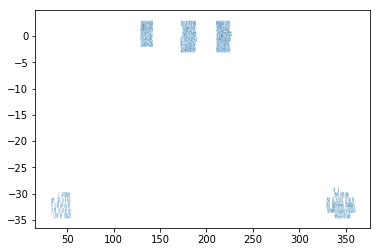

In [27]:
lum_ra = lum["RA"][:]
lum_dec = lum["DEC"][:]
plt.scatter(lum_ra, lum_dec , s = 0.0001)

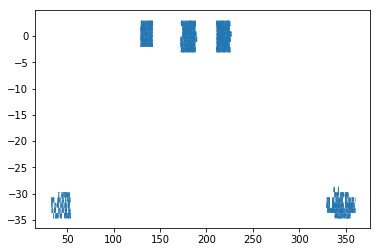

In [26]:
dense_ra = dense["RA"][:]
dense_dec = dense["DEC"][:]
plt.scatter(dense_ra, dense_dec , s = 0.0001)